<a href="https://colab.research.google.com/github/juanjohn/globalisation_indian_context/blob/master/McKinsey_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!wget http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
!unzip wiot_stata_Nov16.zip -d './data'
!ls ./data

--2020-01-12 05:03:11--  http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
Resolving www.wiod.org (www.wiod.org)... 129.125.14.26
Connecting to www.wiod.org (www.wiod.org)|129.125.14.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638963496 (609M) [application/zip]
Saving to: ‘wiot_stata_Nov16.zip.1’

wiot_stata_Nov16.zi 100%[===================>] 609.36M   148MB/s    in 3.8s    

2020-01-12 05:03:15 (161 MB/s) - ‘wiot_stata_Nov16.zip.1’ saved [638963496/638963496]

Archive:  wiot_stata_Nov16.zip
replace ./data/WIOT2000_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2001_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2002_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
WIOT2000_October16_ROW.dta  WIOT2008_October16_ROW.dta
WIOT2001_October16_ROW.dta  WIOT2009_October16_ROW.dta
WIOT2002_October16_ROW.dta  WIOT2010_October16_ROW.dta
WIOT2003_October16_ROW.dta  WIOT2011_O

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
df = pd.read_stata('./data/WIOT2014_October16_ROW.dta')

In [135]:
df.loc[df['Country']=='IND'].head(n=3)

,IndustryCode,IndustryDescription,Country,RNr,Year,vAUS1,vAUS2,vAUS3,vAUS4,vAUS5,vAUS6,vAUS7,vAUS8,vAUS9,vAUS10,vAUS11,vAUS12,vAUS13,vAUS14,vAUS15,vAUS16,vAUS17,vAUS18,vAUS19,vAUS20,vAUS21,vAUS22,vAUS23,vAUS24,vAUS25,vAUS26,vAUS27,vAUS28,vAUS29,vAUS30,vAUS31,vAUS32,vAUS33,vAUS34,vAUS35,...,vRUS58,vRUS59,vRUS60,vRUS61,vSVK57,vSVK58,vSVK59,vSVK60,vSVK61,vSVN57,vSVN58,vSVN59,vSVN60,vSVN61,vSWE57,vSWE58,vSWE59,vSWE60,vSWE61,vTUR57,vTUR58,vTUR59,vTUR60,vTUR61,vTWN57,vTWN58,vTWN59,vTWN60,vTWN61,vUSA57,vUSA58,vUSA59,vUSA60,vUSA61,vROW57,vROW58,vROW59,vROW60,vROW61,TOT
1176,A01,"Crop and animal production, hunting and relate...",IND,1,2014,12.595510,0.109661,0.222930,0.483897,24.557554,0.720161,0.000019,0.000975,0.000041,0.000024,0.083706,0.105187,0.142559,0.000083,0.00016,0.00127,0.000015,0.000096,0.000051,0.00006,0.000178,0.008101,0.0,0.003151,0.010891,0.00008,0.425841,0.004196,0.355994,1.257126,0.020023,0.002644,0.000176,0.005536,0.000194,...,2.752187e-08,0.964912,2.745443e-08,0.920482,0.544143,0.0,0.000373,0.0,1.080178e-07,1.098715,4.512937e-10,0.000022,5.276362e-09,0.011652,24.250883,0.0,0.000583,0.000636,7.591295e-08,27.519732,0.0,0.244105,0.155142,1.059035,9.709461,0.110047,3.932446e-07,0.015656,0.021043,420.577764,0.0,0.0,0.000003,0.128881,2108.198081,0.001091,41.267703,59.820680,-0.124461,369345.852376
1177,A02,Forestry and logging,IND,2,2014,0.009305,0.023144,0.000012,0.001337,0.000000,0.000000,0.164297,0.000000,0.000522,0.000023,0.018434,0.003366,0.002881,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000302,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.003949,0.0,0.000947,0.0,0.000000e+00,0.006036,0.000000e+00,0.000023,0.000000e+00,0.000000,0.004667,0.0,0.000000,0.000000,0.000000e+00,0.014281,0.0,0.000399,0.000000,0.000000,0.000833,0.019565,0.000000e+00,0.015225,0.000000,32.290439,0.0,0.0,0.000000,0.000000,1.615400,0.000011,0.000269,0.003726,-0.004561,28393.859498
1178,A03,Fishing and aquaculture,IND,3,2014,0.020071,0.000000,0.021533,0.000000,0.355398,0.025788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.137436,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.028487,0.471133,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.015785,0.006478,0.0,0.000000,0.0,0.000000e+00,0.034173,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000042,0.0,0.000000,0.000000,0.000000e+00,0.306284,0.0,0.000000,0.000000,0.000000,35.786611,1.170403,0.000000e+00,0.000000,0.000000,0.955633,0.0,0.0,0.000000,0.109437,1128.632710,0.001079,0.012902,0.999961,-0.006308,17620.475342


In [136]:
df_m = pd.read_csv('Copy of WEO_Data.csv', index_col=0)
df_m2 = df_m.loc[df_m["Units"]=="Purchasing power parity; international dollars"]

df_m3 = df_m2.drop(['Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'], axis=1)
df_m4 = df_m3.T
df_m4.head()

Country,Brazil,China,France,Germany,India,Russia,United States
1991,"1,065.79","1,263.88","1,158.70","1,780.33","1,035.22",NaN,"6,158.13"
1992,"1,084.03","1,476.25","1,204.06","1,855.95","1,116.86","1,707.69","6,520.33"
1993,"1,164.20","1,721.29","1,224.84","1,881.39","1,197.64","1,596.06","6,858.55"
1994,"1,258.48","1,986.59","1,280.50","1,967.58","1,304.66","1,423.11","7,287.25"
1995,"1,339.24","2,249.71","1,334.89","2,039.80","1,432.91","1,393.38","7,639.75"


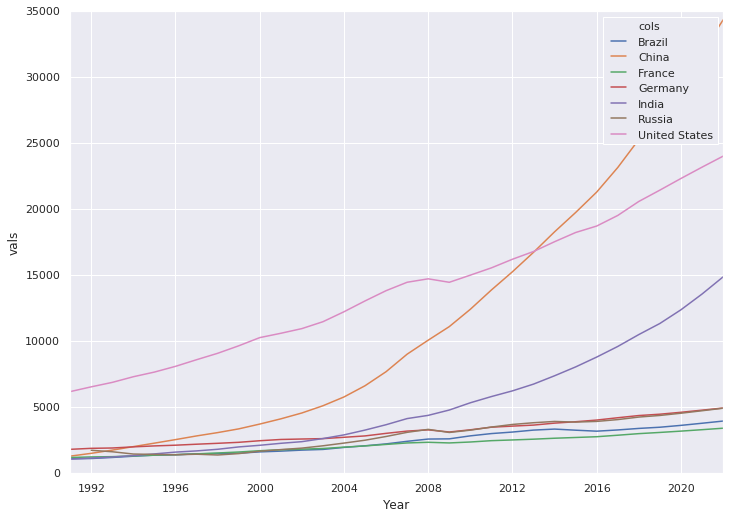

In [137]:
df_m4['Year'] = df_m4.index.values
df_m4['Year'] = pd.to_datetime(df_m4.Year, format='%Y')
#df_m4 = df_m4['Brazil'].astype(float)
df_m4[df_m4.columns[0:7]] = df_m4[df_m4.columns[0:7]].replace({'\$': '', ',': ''}, regex=True)
df_m4[df_m4.columns[0:7]] = df_m4[df_m4.columns[0:7]].astype(float)

df_m5 = df_m4.melt('Year', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Year", y="vals", hue='cols', data=df_m5 )#, height=10, aspect=11.7/8.27)

In [0]:
df_m5 = df_m4.melt('Year', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Year", y="vals", hue='cols', data=df_m5 )#, height=10, aspect=11.7/8.27)